# DBSCAN and Clustering Assignment
___

## The Data

Source: https://archive.ics.uci.edu/ml/datasets/Wholesale+customers

Margarida G. M. S. Cardoso, margarida.cardoso '@' iscte.pt, ISCTE-IUL, Lisbon, Portugal


Attribute Information:

    1) FRESH: annual spending (m.u.) on fresh products (Continuous);
    2) MILK: annual spending (m.u.) on milk products (Continuous);
    3) GROCERY: annual spending (m.u.)on grocery products (Continuous);
    4) FROZEN: annual spending (m.u.)on frozen products (Continuous)
    5) DETERGENTS_PAPER: annual spending (m.u.) on detergents and paper products (Continuous)
    6) DELICATESSEN: annual spending (m.u.)on and delicatessen products (Continuous);
    7) CHANNEL: customers Channel - Horeca (Hotel/Restaurant/CafÃ©) or Retail channel (Nominal)
    8) REGION: customers Region Lisnon, Oporto or Other (Nominal)

## Q1: Imports and Data Reading 

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import DBSCAN

In [45]:
# Load the dataset

df = pd.read_csv('wholesome_customers_data.csv')

# Display the first few rows of the dataframe

df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


## Q2: EDA
1. Create a scatterplot showing the relation between MILK and GROCERY spending, colored by Channel column.
2. Use seaborn to create a histogram of MILK spending, colored by Channel. Can you figure out how to use seaborn to "stack" the channels, instead of have them overlap?
3. Create an annotated clustermap of the correlations between spending on different cateogires.
4. Create a PairPlot of the dataframe, colored by Region.

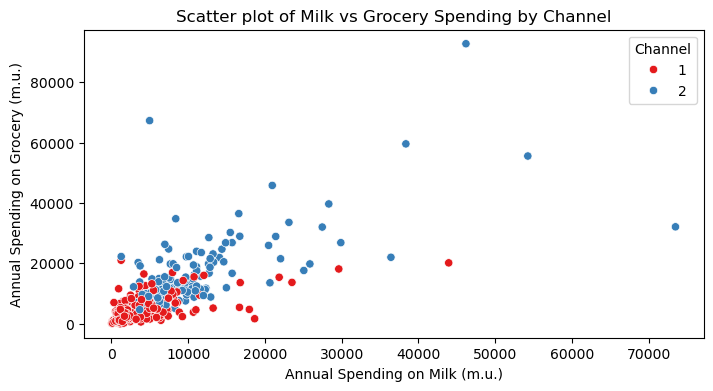

In [46]:
# Milk and grocery scatterplot

# Create a scatter plot

plt.figure(figsize=(8, 4))
sns.scatterplot(data=df, x='Milk', y='Grocery', hue='Channel', palette='Set1')

# Add labels and title

plt.title('Scatter plot of Milk vs Grocery Spending by Channel')
plt.xlabel('Annual Spending on Milk (m.u.)')
plt.ylabel('Annual Spending on Grocery (m.u.)')
plt.legend(title='Channel')
plt.show()

<Figure size 800x400 with 0 Axes>

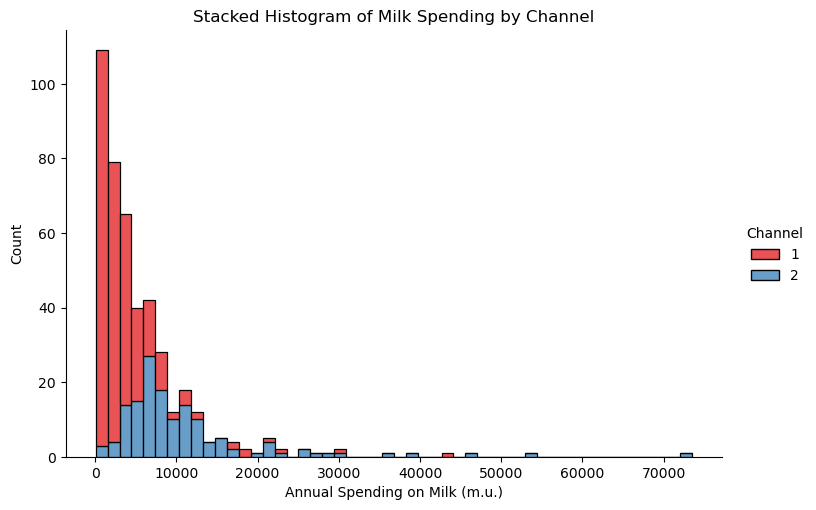

In [47]:
# Milk spending historgram

# Create a stacked histogram for MILK spending colored by Channel

plt.figure(figsize=(8, 4))
sns.displot(data=df, x='Milk', hue='Channel', kind='hist', multiple='stack', palette='Set1', aspect=1.5)

# Add labels and title

plt.title('Stacked Histogram of Milk Spending by Channel')
plt.xlabel('Annual Spending on Milk (m.u.)')
plt.ylabel('Count')
plt.show()

<Figure size 800x400 with 0 Axes>

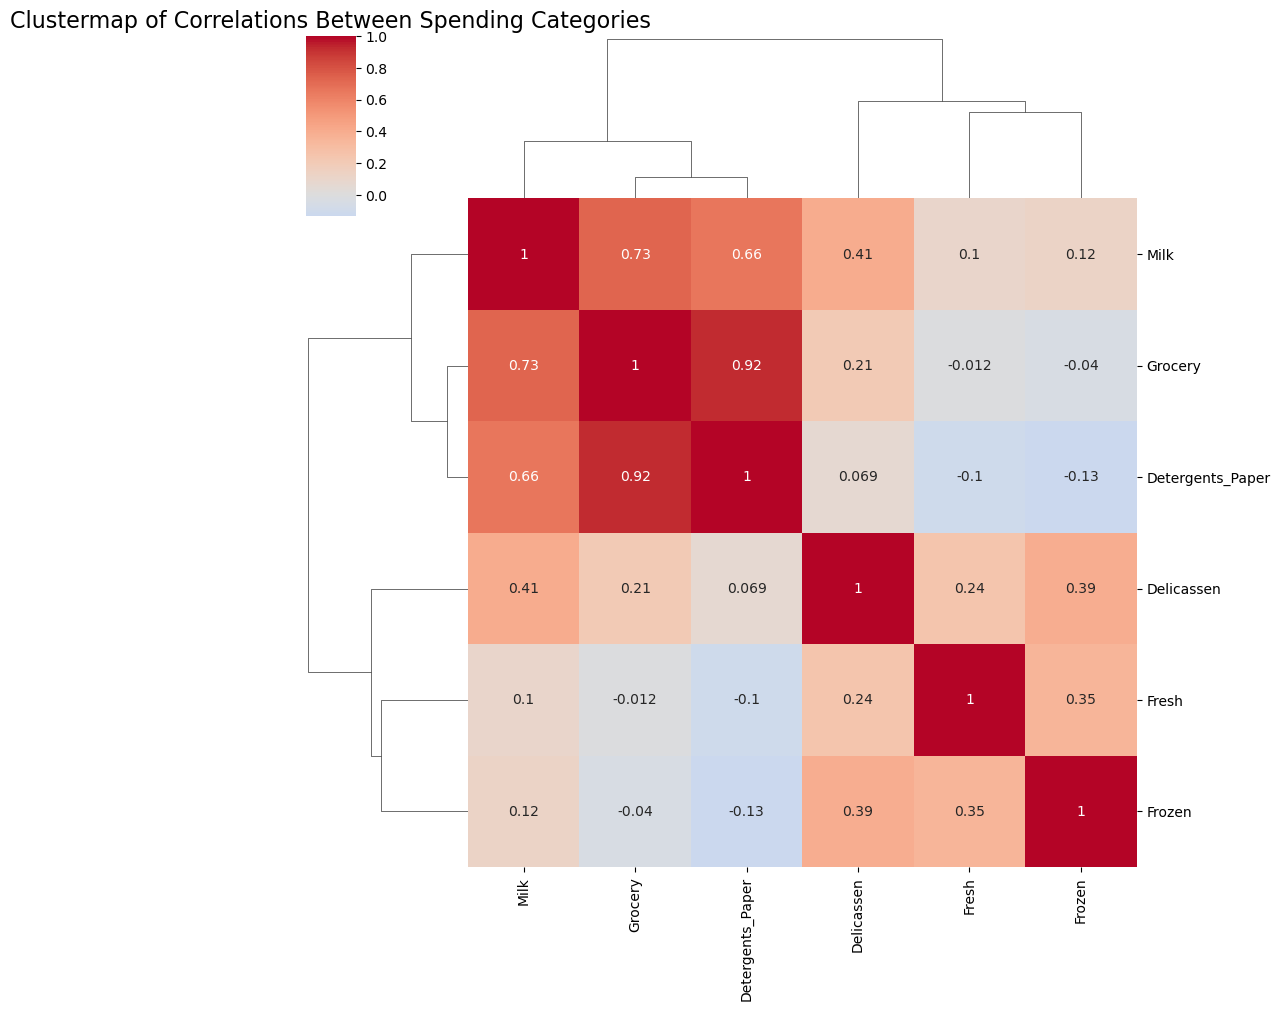

In [48]:
# Spending clustermap

# Select only the spending columns for correlation analysis

spending_columns = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
correlation_matrix = df[spending_columns].corr()

# Create an annotated clustermap of the correlation matrix

plt.figure(figsize=(8, 4))
clustermap = sns.clustermap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Clustermap of Correlations Between Spending Categories', size=16)
plt.show()

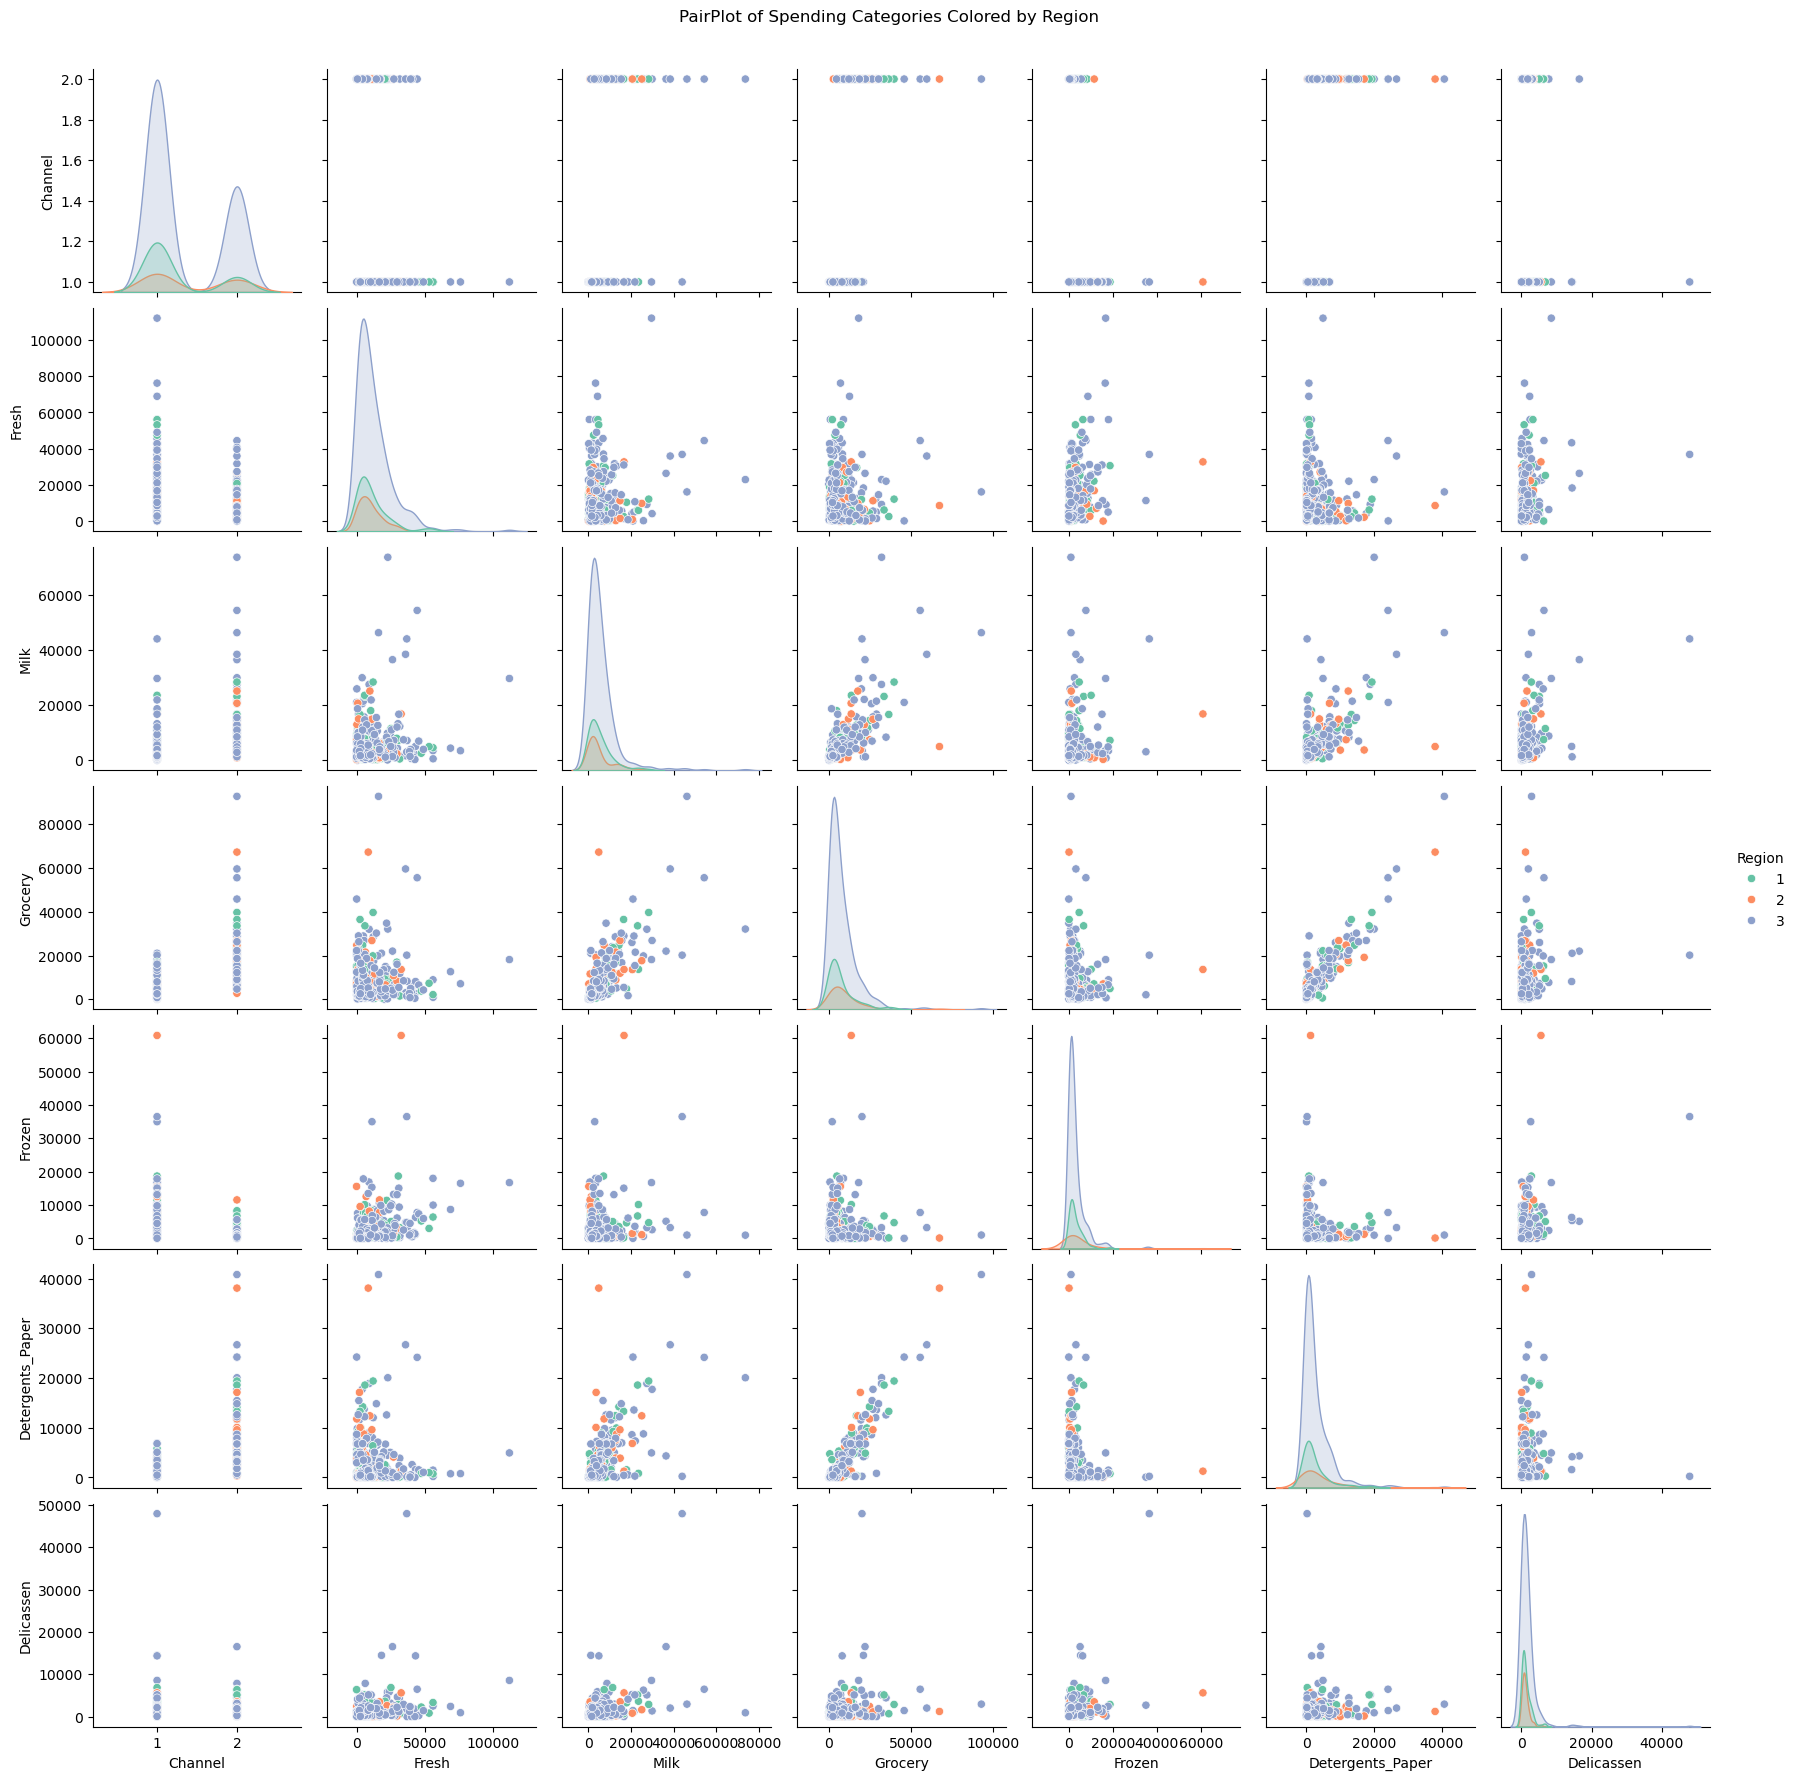

In [49]:
# Pairplot

pairplot = sns.pairplot(df, hue='Region', palette='Set2')
pairplot.fig.suptitle('PairPlot of Spending Categories Colored by Region', y=1.02)
plt.show()

## Q3: DBSCAN

1. Since the values of the features are in different orders of magnitude, let's scale the data. Use StandardScaler to scale the data.
2. Use DBSCAN and a for loop to create a variety of models testing different epsilon values. Set min_samples equal to 2 times the number of features. During the loop, keep track of and log the percentage of points that are outliers. For reference the solutions notebooks uses the following range of epsilon values for testing:

        np.linspace(0.001,3,50)

3. Create a line plot of the percentage of outlier points versus the epsilon value choice.
4. Based on the plot created in the previous task, retrain a DBSCAN model with a reasonable epsilon value. 
5. Create a scatterplot of Milk vs Grocery, colored by the discovered labels of the DBSCAN model.
6. Create a new column on the original dataframe called "Labels" consisting of the DBSCAN labels.
7. Compare the statistical mean of the clusters and outliers for the spending amounts on the categories.
8. Normalize the dataframe from the previous task using MinMaxScaler so the spending means go from 0-1 and create a heatmap of the values.
9. Create another heatmap similar to the one above, but with the outliers removed.

In [50]:
# Scale data

scaler = StandardScaler()
data_scaled = scaler.fit_transform(df[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']])

In [51]:
# Loop for eps values

eps_values = np.linspace(0.001,3,50)
outlier_counts = []

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=5)
    labels = dbscan.fit_predict(data_scaled)
    outliers = np.sum(labels == -1)
    outlier_counts.append(outliers)

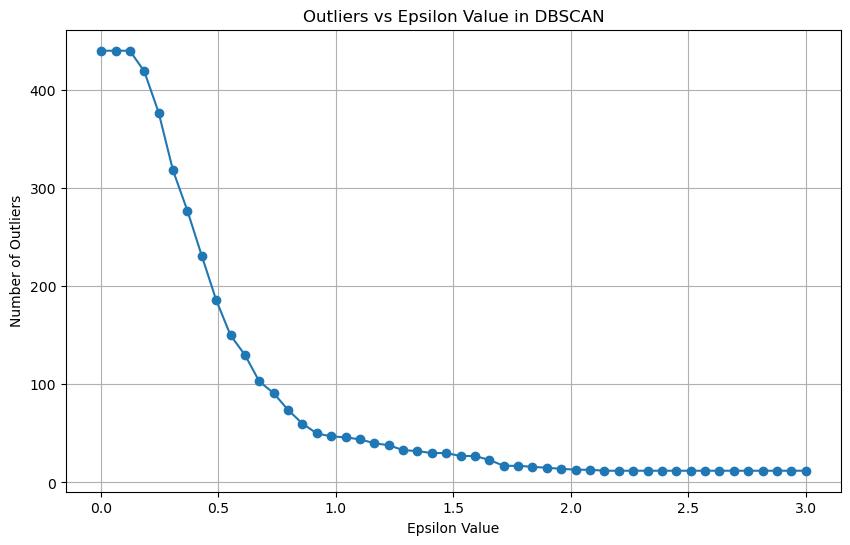

In [52]:
# Outlier points vs. eps value lineplot

plt.figure(figsize=(10, 6))
plt.plot(eps_values, outlier_counts, marker='o')
plt.xlabel('Epsilon Value')
plt.ylabel('Number of Outliers')
plt.title('Outliers vs Epsilon Value in DBSCAN')
plt.grid(True)
plt.show()

In [53]:
# DBSCAN with chosen eps value

# Based on the plot, we will choose a reasonable epsilon value

chosen_eps = 1.5
dbscan = DBSCAN(eps=chosen_eps, min_samples=5)
labels = dbscan.fit_predict(data_scaled)

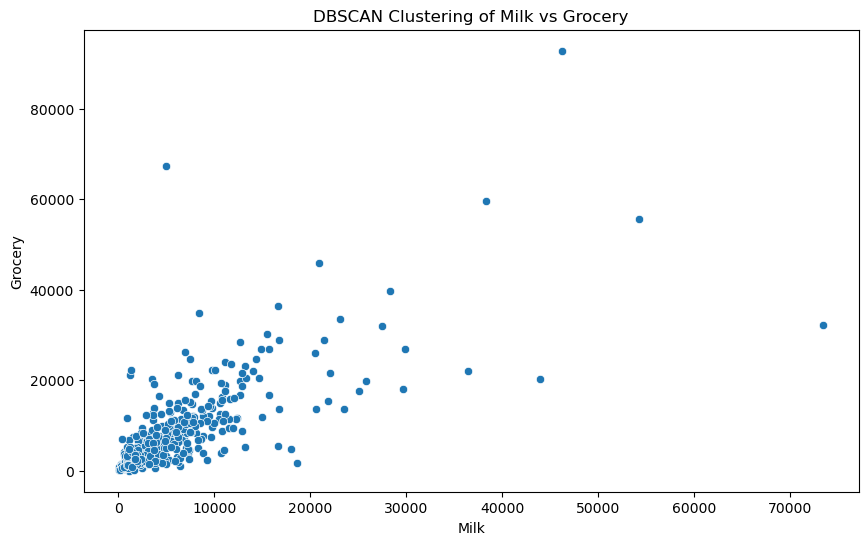

In [54]:
# Milk vs. grocery scatterplot

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Milk', y='Grocery', data=df)
plt.title('DBSCAN Clustering of Milk vs Grocery')
plt.show()

In [55]:
# Add new column "Labels"

df['Labels'] = labels

In [56]:
# Compare means

cluster_means = df.groupby('Labels').mean()
cluster_means

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Labels,,,,,,,,
-1,1.555556,2.703704,27308.962963,22611.629630,28094.111111,10363.703704,10749.925926,6367.888889
0,1.307506,2.532688,10999.489104,4696.956416,6634.433414,2595.230024,2367.092010,1208.256659


In [57]:
# Normalize DataFrame

scaler = MinMaxScaler()
data_normalized = scaler.fit_transform(df[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']])
data_normalized = pd.DataFrame(data_normalized, columns=['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen'])

# Adding the labels back to the normalized data

data_normalized['Labels'] = labels

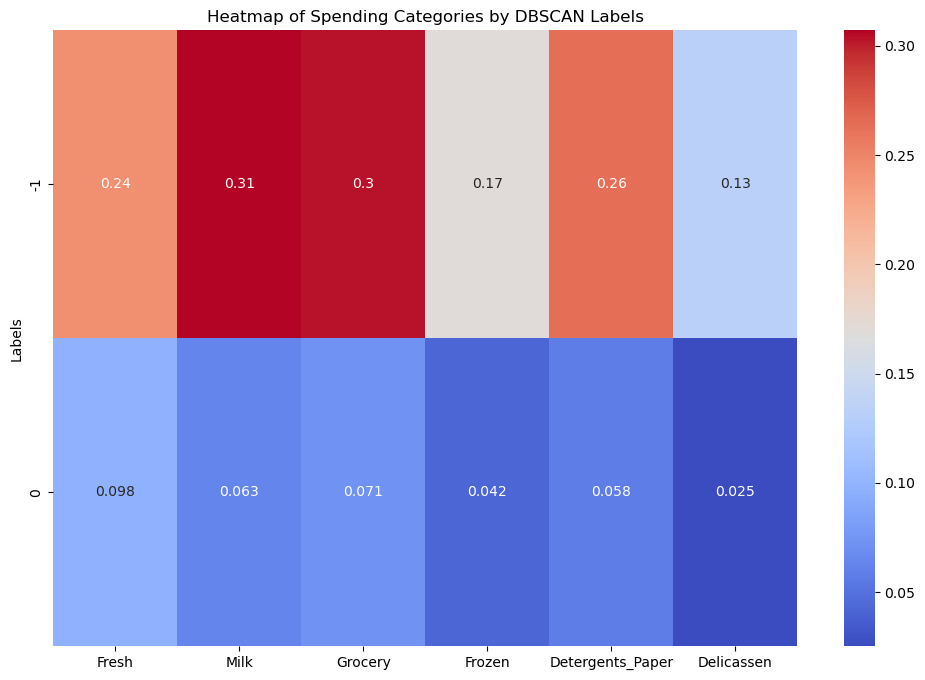

In [58]:
# Heatmap

plt.figure(figsize=(12, 8))
sns.heatmap(data_normalized.groupby('Labels').mean(), annot=True, cmap='coolwarm')
plt.title('Heatmap of Spending Categories by DBSCAN Labels')
plt.show()

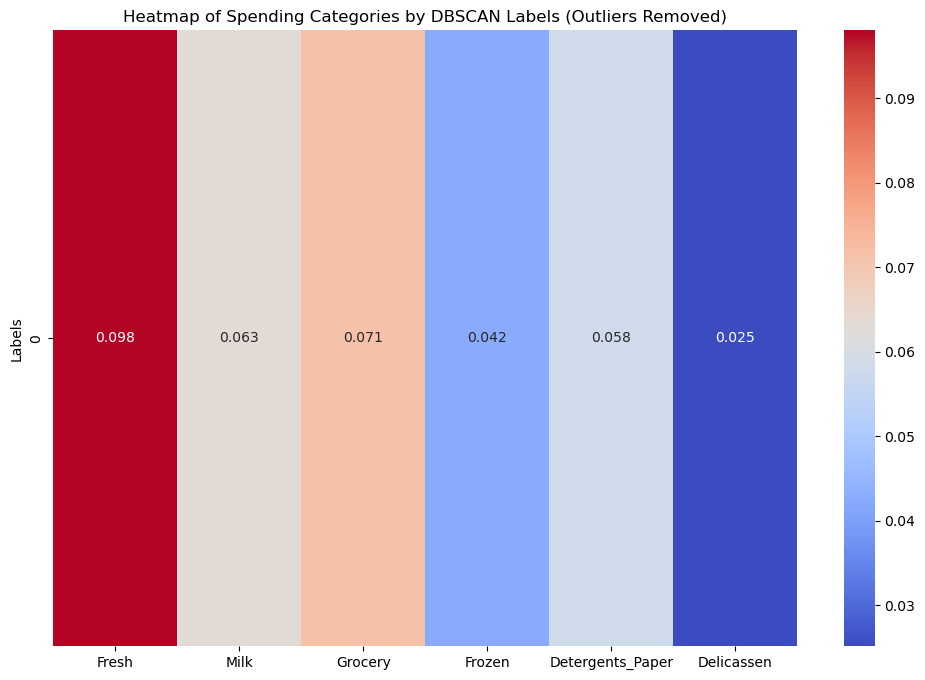

In [59]:
# Heatmap with no outliers

data_normalized_no_outliers = data_normalized[data_normalized['Labels'] != -1]

plt.figure(figsize=(12, 8))
sns.heatmap(data_normalized_no_outliers.groupby('Labels').mean(), annot=True, cmap='coolwarm')
plt.title('Heatmap of Spending Categories by DBSCAN Labels (Outliers Removed)')
plt.show()

# The End!